In [1]:
import numpy as np
import pandas as pd
import warnings
import numpy as np
from itertools import product
from turtle import shape
import matplotlib.pyplot as plt
from matplotlib import ticker
from mpl_toolkits.mplot3d import Axes3D
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = ['Times New Roman']   
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

data = pd.read_excel('酶复配数据集.xlsx')
data = data.drop_duplicates()

In [2]:
label_encoder = LabelEncoder()
data['酶'] = label_encoder.fit_transform(data['酶'])
data['助剂'] = label_encoder.fit_transform(data['助剂'])

In [3]:
data = data.rename(columns={'酶': 'enzyme'})
data = data.rename(columns={'助剂':'auxiliary'})
data = data.rename(columns={'浓度':'concentration'})
data = data.rename(columns={'孵育温度':'incubation temperature'})
data = data.rename(columns={'孵育时间':'incubation time'})
data = data.rename(columns={'酶活':'enzyme activity'})

In [4]:
data

,enzyme,auxiliary,pH,concentration,incubation temperature,incubation time,enzyme activity
0,0,0,7.5,0.002,70,40,0.065300
1,0,0,6.0,0.010,70,40,0.365800
2,0,0,7.5,0.010,70,60,0.408300
3,0,0,7.5,0.100,70,40,0.606200
4,0,0,7.5,0.010,30,60,0.683300
...,...,...,...,...,...,...,...
221,1,0,9.0,0.010,70,40,0.029822
222,1,3,9.0,0.010,70,40,0.026936
223,1,8,6.0,0.010,70,40,0.036556
224,1,8,9.0,0.010,70,40,0.039923


In [5]:
features_all = data.corr()['enzyme activity'].abs().sort_values(ascending=False) 
features = features_all
features

enzyme activity           1.000000
incubation time           0.371288
incubation temperature    0.289465
pH                        0.182146
concentration             0.170076
enzyme                    0.134320
auxiliary                 0.028347
Name: enzyme activity, dtype: float64

In [6]:
features.drop('enzyme activity', axis=0, inplace=True)
features_index = features.index
for i in range(len(features)):
    print("%2d. %-*s    %f" % (i + 1, 30, features_index[i], features[i]))

 1. incubation time                   0.371288
 2. incubation temperature            0.289465
 3. pH                                0.182146
 4. concentration                     0.170076
 5. enzyme                            0.134320
 6. auxiliary                         0.028347


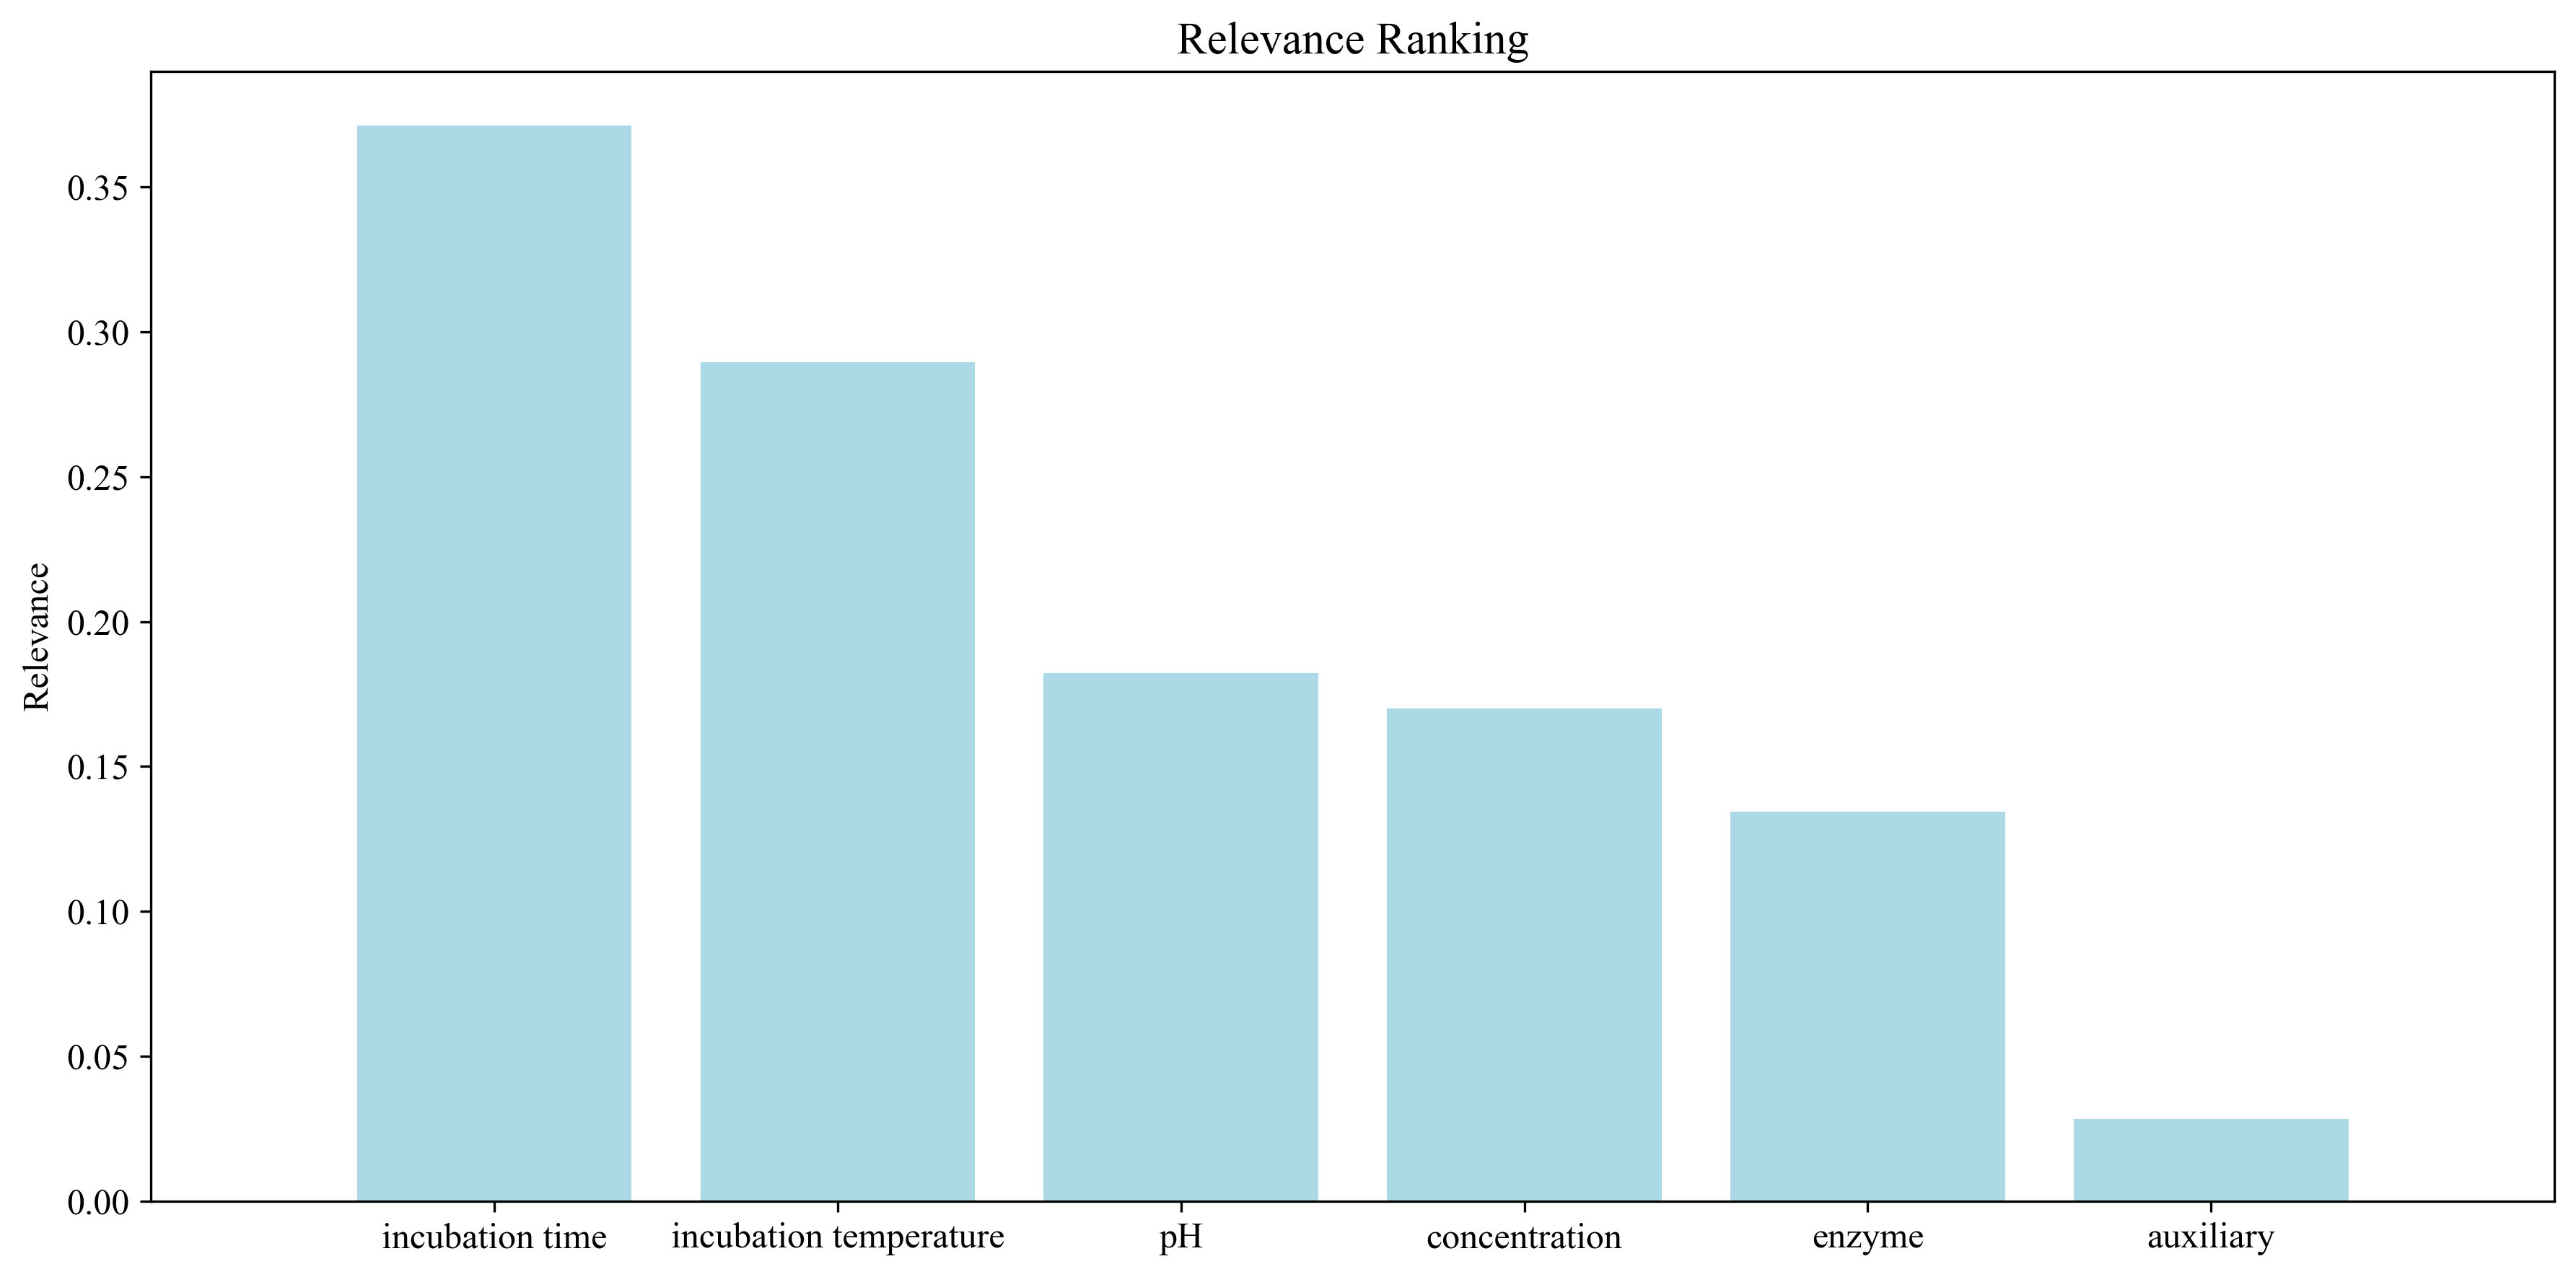

In [7]:
#绘制特征相关性图像
plt.figure(dpi = 300,figsize=(12, 6))
plt.title('Relevance Ranking',fontsize=15)
plt.bar(range(len(features)), features,color='lightblue', align='center')
plt.ylabel('Relevance',fontsize=12)
plt.xticks(range(len(features_index)),features_index,fontsize=12,rotation=0)
plt.yticks(fontsize=12,rotation=0)
plt.xlim([-1, len(features)])
plt.tight_layout()
plt.savefig('相关性排名')
plt.show()

In [8]:
x = data.drop(columns=['enzyme activity'], axis=1)  
y = data['enzyme activity']
feat_labels = x.columns                                 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 44)  
rf = RandomForestRegressor()    
rf_pipe = Pipeline([('imputer', SimpleImputer(strategy='mean')),  ('rf', rf)])  
rf_pipe.fit(x_train, y_train)
y_pred = rf.predict(x_test)


rf = rf_pipe.__getitem__('rf')    
importance = rf.feature_importances_   


imp_result = np.argsort(importance)[::-1]

allimp_result = np.argsort(importance)[::-1]
for i in range(len(allimp_result)):
    print("%2d. %-*s     %f" % (i + 1, 30, feat_labels[allimp_result[i]], importance[allimp_result[i]]))

 1. incubation time                    0.235083
 2. pH                                 0.207129
 3. auxiliary                          0.189153
 4. enzyme                             0.157302
 5. incubation temperature             0.131777
 6. concentration                      0.079555


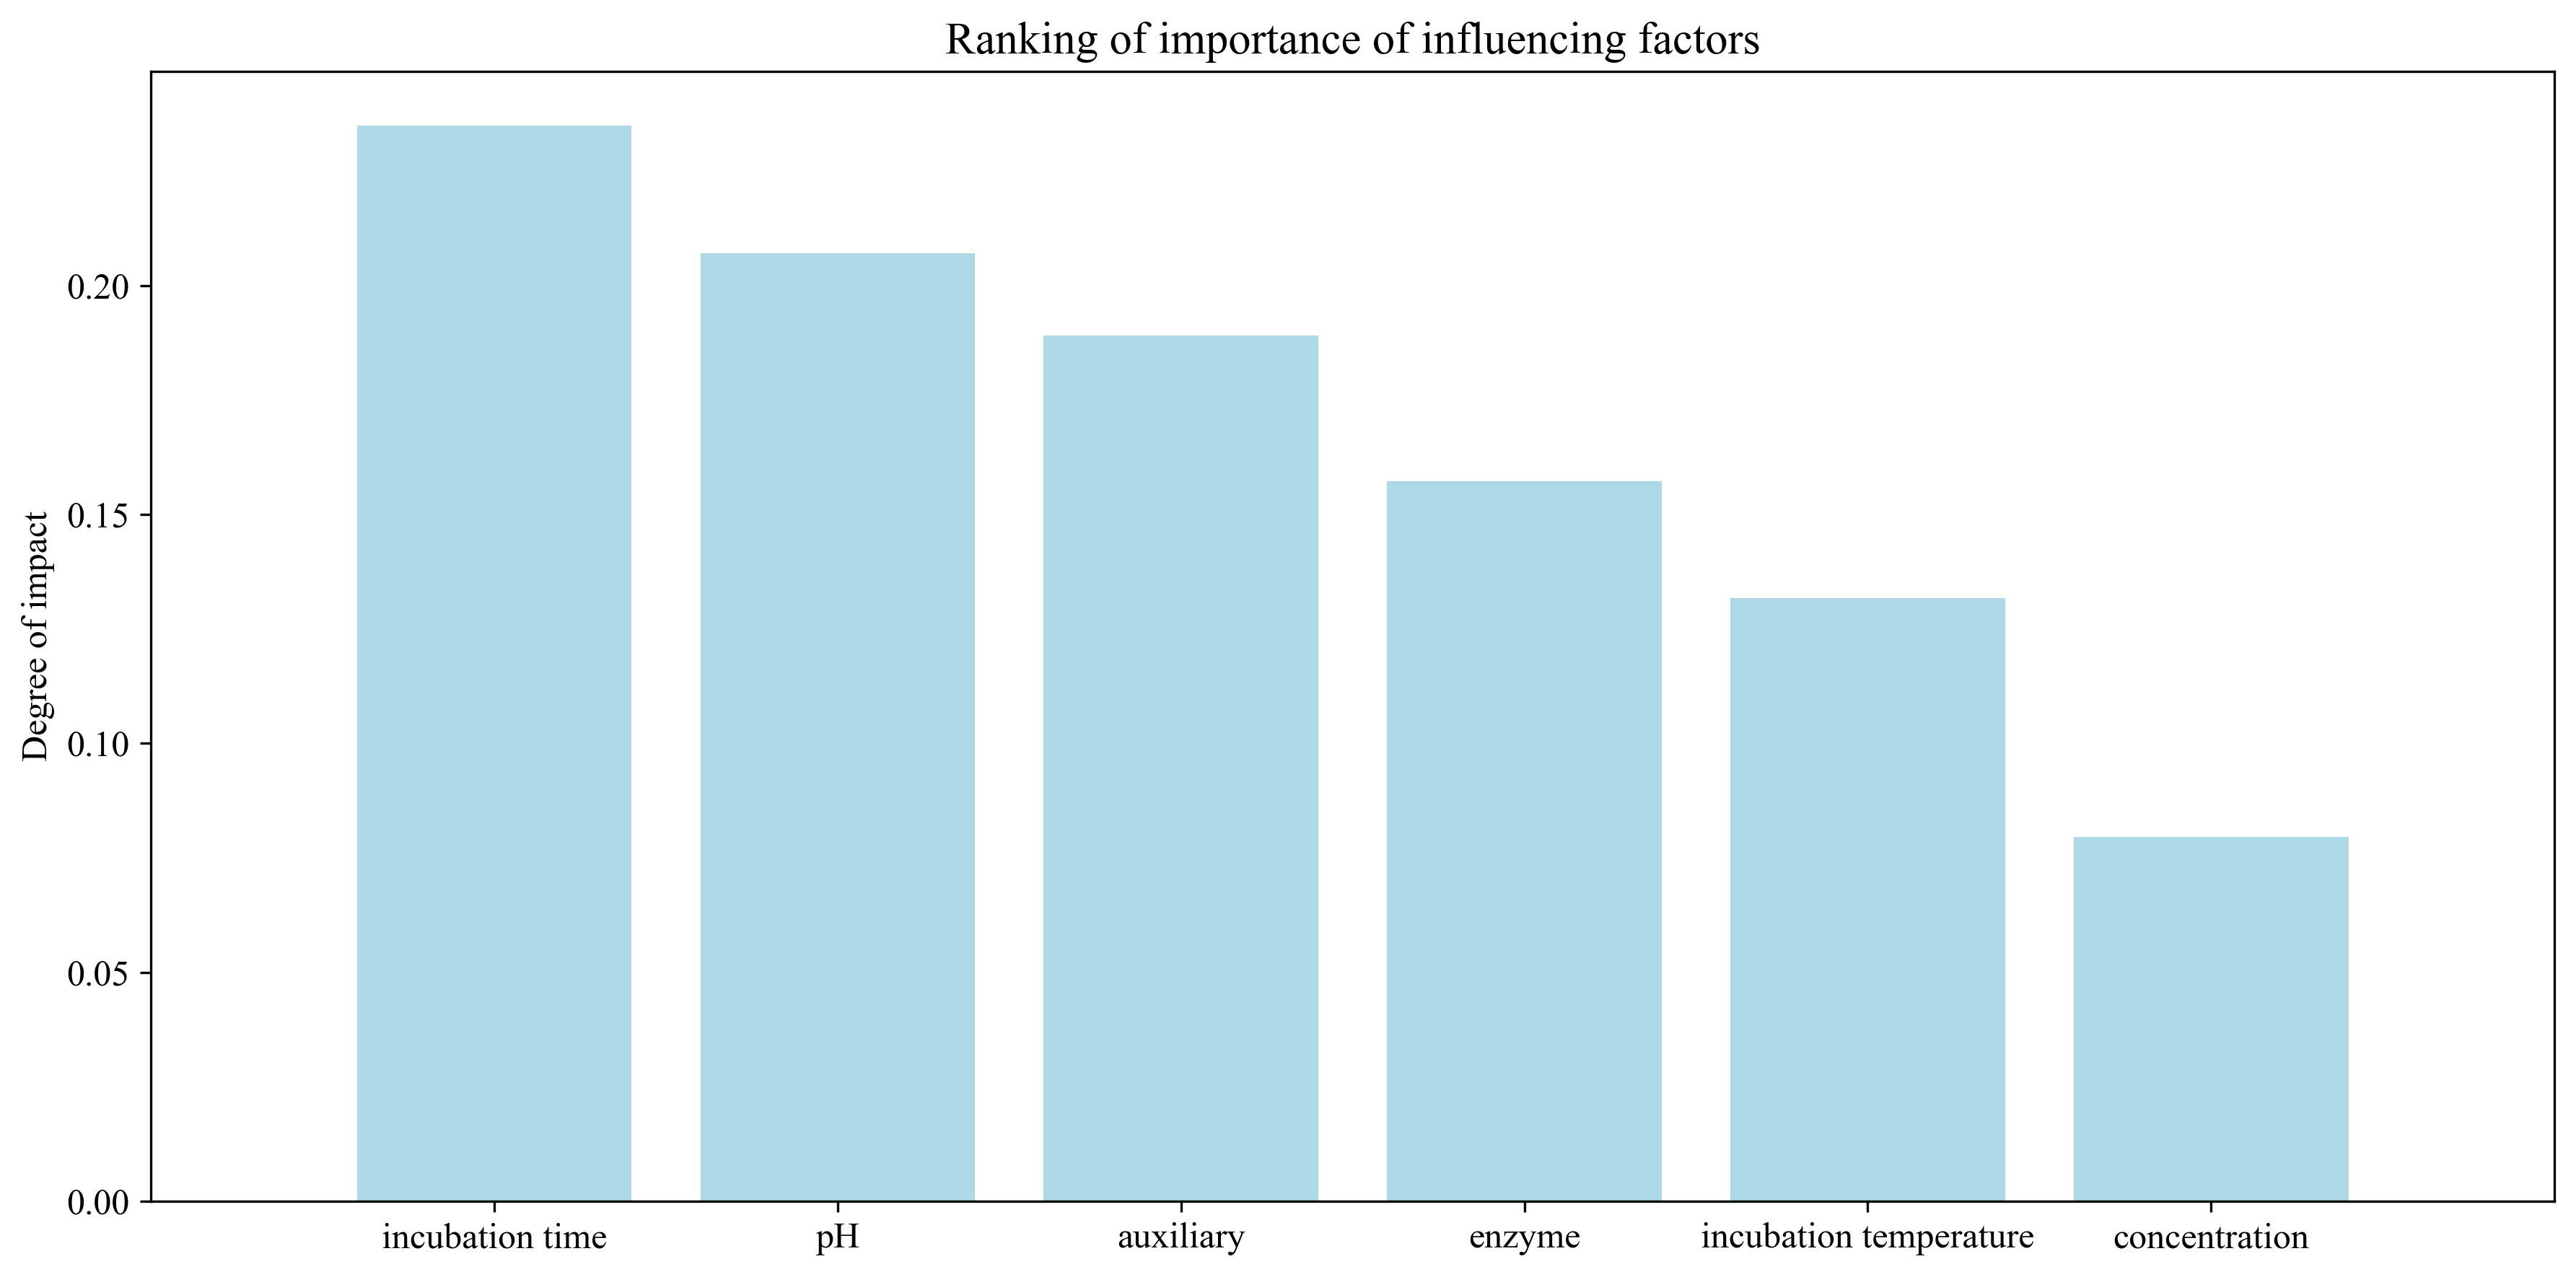

In [9]:
feat_label = [feat_labels[i] for i in imp_result] 

plt.figure(figsize=(12, 6),dpi = 300)
plt.title('Ranking of importance of influencing factors',fontsize=15)
plt.bar(range(len(imp_result)), importance[imp_result], color='lightblue', align='center')
plt.xticks(range(len(imp_result)), feat_label,fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Degree of impact',fontsize=12)
plt.xlim([-1, len(imp_result)])
plt.tight_layout()
plt.savefig('特征重要性排名.jpg', dpi=600, bbox_inches='tight')
plt.show()

In [10]:
pre1 = rf.predict(x_train)
pre2 = rf.predict(x_test)
R2_1 = r2_score(y_train,pre1)
R2_2 = r2_score(y_test,pre2)
print("train_model's R2: {:.4f}".format(R2_1))
print("test_model's R2: {:.4f}".format(R2_2))
mse_train = np.mean(np.power(y_train - pre1, 2))
mse_test = np.mean(np.power(y_test - pre2, 2))
print("train_model's MSE: {:.4f}".format(mse_train))
print("test_model's MSE: {:.4f}".format(mse_test))
print("train_model's RMSE:",np.sqrt(metrics.mean_squared_error(y_train,pre1)))
print("test_model's RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pre2)))

train_model's R2: 0.9373
test_model's R2: 0.6465
train_model's MSE: 0.0094
test_model's MSE: 0.0361
train_model's RMSE: 0.09675526387530611
test_model's RMSE: 0.18991823401503283
